Airline Customer Satisfaction Classification


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/airline_large_dataset.csv')
df.head()



,age,gender,customer_type,travel_type,flight_class,flight_distance,departure_delay,arrival_delay,seat_comfort,inflight_wifi,food_and_drink,cleanliness,baggage_handling,checkin_service,onboard_service,satisfaction
0,56,Male,Returning,Business,Economy,3091,136,128,4,3,2,3,4,3,1,0
1,69,Female,First-time,Business,Economy,3632,3,93,4,1,4,5,3,3,2,1
2,46,Male,First-time,Personal,Economy,1003,88,55,1,1,4,2,3,3,3,0
3,32,Male,Returning,Personal,Economy,3120,176,172,3,4,1,2,2,2,4,0
4,60,Female,Returning,Personal,Economy,1359,133,192,1,1,3,4,5,2,1,0


## Data cleaning and EDA

In [2]:
print('shape of the dataframe:',df.shape)
print()
print('information about the dataframe:',df.info())

shape of the dataframe: (3000, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               3000 non-null   int64 
 1   gender            3000 non-null   object
 2   customer_type     3000 non-null   object
 3   travel_type       3000 non-null   object
 4   flight_class      3000 non-null   object
 5   flight_distance   3000 non-null   int64 
 6   departure_delay   3000 non-null   int64 
 7   arrival_delay     3000 non-null   int64 
 8   seat_comfort      3000 non-null   int64 
 9   inflight_wifi     3000 non-null   int64 
 10  food_and_drink    3000 non-null   int64 
 11  cleanliness       3000 non-null   int64 
 12  baggage_handling  3000 non-null   int64 
 13  checkin_service   3000 non-null   int64 
 14  onboard_service   3000 non-null   int64 
 15  satisfaction      3000 non-null   int64 
dtypes: int64(12), object(4)


In [3]:
print('columns in the dataframe:',df.columns)
print()

print('summary statistics of the dataframe:',df.describe())

columns in the dataframe: Index(['age', 'gender', 'customer_type', 'travel_type', 'flight_class',
       'flight_distance', 'departure_delay', 'arrival_delay', 'seat_comfort',
       'inflight_wifi', 'food_and_drink', 'cleanliness', 'baggage_handling',
       'checkin_service', 'onboard_service', 'satisfaction'],
      dtype='object')

summary statistics of the dataframe:                age  flight_distance  departure_delay  arrival_delay  \
count  3000.000000      3000.000000      3000.000000    3000.000000   
mean     43.563000      2602.830333        90.627333      98.027000   
std      14.941791      1342.944572        51.967843      56.904912   
min      18.000000       300.000000         0.000000       0.000000   
25%      31.000000      1459.750000        46.000000      49.000000   
50%      44.000000      2570.000000        90.000000      97.000000   
75%      56.000000      3746.750000       137.000000     146.000000   
max      69.000000      4997.000000       179.000000     

In [4]:
#Target Variable Analysis
# Target distribution
df['satisfaction'].value_counts()


satisfaction
0    1507
1    1493
Name: count, dtype: int64

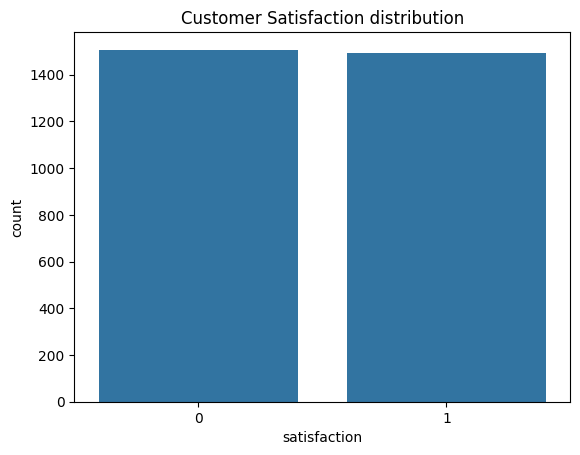

In [5]:
sns.countplot(x='satisfaction',data=df)
plt.title('Customer Satisfaction distribution')
plt.show()


#I analyzed class balance to choose appropriate evaluation metrics.


In [6]:
categorical_cols = ['gender', 'customer_type', 'travel_type', 'flight_class']

for col in categorical_cols:
    print(df[col].value_counts())
    print("------")

#This helped me understand the distribution of categorical features and informed encoding strategies.



gender
Male      1530
Female    1470
Name: count, dtype: int64
------
customer_type
Returning     2084
First-time     916
Name: count, dtype: int64
------
travel_type
Business    1544
Personal    1456
Name: count, dtype: int64
------
flight_class
Economy     2284
Business     716
Name: count, dtype: int64
------


In [7]:
df.isnull().sum()
#No missing values found in the dataset.

age                 0
gender              0
customer_type       0
travel_type         0
flight_class        0
flight_distance     0
departure_delay     0
arrival_delay       0
seat_comfort        0
inflight_wifi       0
food_and_drink      0
cleanliness         0
baggage_handling    0
checkin_service     0
onboard_service     0
satisfaction        0
dtype: int64

In [8]:
df.duplicated().sum()
#No duplicate rows found in the dataset.
#If > 0, we drop them 

df = df.drop_duplicates()


In [9]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Splitting the dataset into training and testing sets

## ENCODING CATEGORICAL VARIABLES

## ENCODING CATEGORICAL VARIABLES

- ML models cannot understand text, so we encode.
Why One-Hot Encoding?

- No ordinal relationship
Safe for Logistic, SVM, KNN

In [10]:
X = pd.get_dummies(X, drop_first=True)
# One-hot encoding categorical variables
# This converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction.

X.head()

,age,flight_distance,departure_delay,arrival_delay,seat_comfort,inflight_wifi,food_and_drink,cleanliness,baggage_handling,checkin_service,onboard_service,gender_Male,customer_type_Returning,travel_type_Personal,flight_class_Economy
0,56,3091,136,128,4,3,2,3,4,3,1,True,True,False,True
1,69,3632,3,93,4,1,4,5,3,3,2,False,False,False,True
2,46,1003,88,55,1,1,4,2,3,3,3,True,False,True,True
3,32,3120,176,172,3,4,1,2,2,2,4,True,True,True,True
4,60,1359,133,192,1,1,3,4,5,2,1,False,True,True,True


## FEATURE SCALING 

## FEATURE SCALING 

- Models like : Logistic Regression, KNN, SVM, Neural Networks need scaling.
- I applied feature scaling to improve convergence and model performance.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head(10)

,age,flight_distance,departure_delay,arrival_delay,seat_comfort,inflight_wifi,food_and_drink,cleanliness,baggage_handling,checkin_service,onboard_service,gender_Male,customer_type_Returning,travel_type_Personal,flight_class_Economy
0,0.832502,0.363568,0.873237,0.526809,0.657492,-0.041625,-0.732857,-0.037411,0.704990,0.013704,-1.419623,0.980196,0.662978,-0.971085,0.559897
1,1.702690,0.766481,-1.686465,-0.088355,0.657492,-1.429132,0.681470,1.383249,-0.000941,0.013704,-0.704568,-1.020204,-1.508347,-0.971085,0.559897
2,0.163127,-1.191484,-0.050565,-0.756247,-1.462691,-1.429132,0.681470,-0.747740,-0.000941,0.013704,0.010487,0.980196,-1.508347,1.029776,0.559897
3,-0.773999,0.385165,1.643072,1.300157,-0.049235,0.652128,-1.440020,-0.747740,-0.706873,-0.695125,0.725542,0.980196,0.662978,1.029776,0.559897
4,1.100252,-0.926351,0.815499,1.651679,-1.462691,-1.429132,-0.025694,0.672919,1.410922,-0.695125,-1.419623,-1.020204,0.662978,1.029776,0.559897
5,-1.242562,1.393566,-0.185286,-1.687781,-0.755963,1.345882,-0.732857,-0.037411,-1.412804,0.013704,0.010487,0.980196,0.662978,1.029776,0.559897
6,-0.372374,-0.748354,-1.359285,-1.353835,0.657492,-0.041625,-0.732857,0.672919,-1.412804,0.722533,-0.704568,0.980196,0.662978,1.029776,0.559897
7,0.832502,-0.746120,0.988712,1.774712,-0.049235,1.345882,1.388633,-1.458070,-1.412804,1.431362,-0.704568,-1.020204,0.662978,-0.971085,0.559897
8,-0.506249,-1.213827,0.700024,-0.756247,0.657492,1.345882,1.388633,-0.747740,1.410922,0.722533,-0.704568,0.980196,-1.508347,-0.971085,0.559897
9,-0.238498,0.041833,0.257369,-1.424139,-1.462691,-0.735379,-0.732857,0.672919,1.410922,0.013704,0.010487,-1.020204,0.662978,1.029776,0.559897


TRAIN–TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


I performed EDA to understand distributions and class balance, handled duplicates, encoded categorical variables using one-hot encoding, scaled numerical features, and prepared the data using train-test split before modeling

----------------

---------------------

## BASE MODELS (CLASSIFICATION)

## BASE MODELS (CLASSIFICATION)

We will train 4 base models:
1️⃣ Logistic Regression
2️⃣ KNN
3️⃣ SVM
4️⃣ Decision Tree

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


LOGISTIC REGRESSION

In [14]:


# 📌 Why Logistic?
# Baseline classification model
# Interpretable
# Fast
# Works well with binary outcomes
# Probabilistic outputs

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

# evaluation logistic regression
print("Logistic Regression Results: ")
print()
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))


Logistic Regression Results: 

Accuracy: 0.9916666666666667
Precision: 0.99
Recall: 0.9933110367892977
F1 Score: 0.991652754590985


KNN

In [15]:
#📌 Why KNN?

# Instance-based learning
# Sensitive to scaling (we already scaled ✔)
# Simple to implement
# and effective for small to medium-sized datasets


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# evaluation KNN
print("KNN Results:")
print()
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))


KNN Results:

Accuracy: 0.8383333333333334
Precision: 0.8607142857142858
Recall: 0.8060200668896321
F1 Score: 0.8324697754749568


------------------

SUPPORT VECTOR MACHINE (SVM)

In [16]:
#Why SVM?

# Works well in high-dimensional space
# Powerful decision boundary
# Effective in cases where the number of dimensions exceeds the number of samples
# robust to overfitting, especially in high-dimensional spaces


svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# evaluation SVM
print("SVM Results: ")
print()
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))



SVM Results: 

Accuracy: 0.9683333333333334
Precision: 0.9794520547945206
Recall: 0.9565217391304348
F1 Score: 0.9678510998307953


DECISION TREE

In [17]:
#📌 Why Decision Tree?
# Easy to interpret
# Handles non-linearity
# Base learner for ensembles
# Non-parametric model
# Handles both numerical and categorical data well

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


#📌 Evaluate Decision Tree
print("Decision Tree Results")
print()
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


Decision Tree Results

Accuracy: 0.835
Precision: 0.8164556962025317
Recall: 0.862876254180602
F1 Score: 0.8390243902439024


------------------------

## logistic regression : so here logistic reg is high on everything (very high matrics,simple,interpritable,fast) but we cant blindly say it because, may be lead to data leakage, high seperable dataset and also over fitting. good base model  but not ideal for ensemble.

## Knn : simple but poor performance,sensitive to scaling, not suitable for large dataset only for small to medium.

## decition tree : it will capture non-linear relationships, easy to understand, works well with mixed feauters,  only prblm is overfits. so i chose this as for ensemble, because ensemble tech like boosting, random forest are designed to reduce the high varience of decision trees and improve their generalization performance, they capture complex non-linear relationships and combining multi trees overcome overfit problm, so..

## svm : strong performance and handles complex boundaries but hard to interpret, expensive computation not ideal for ensemble.

MODEL COMPARISON

In [18]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_dt)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_dt)
    ]
})

results


,Model,Accuracy,F1 Score
0,Logistic Regression,0.991667,0.991653
1,KNN,0.838333,0.832470
2,SVM,0.968333,0.967851
3,Decision Tree,0.835000,0.839024


In [19]:
# Cross-validation using F1-score
from sklearn.model_selection import cross_val_score

log_f1 = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='f1').mean()
dt_f1 = cross_val_score(dt, X_scaled, y, cv=5, scoring='f1').mean()
svm_f1 = cross_val_score(svm, X_scaled, y, cv=5, scoring='f1').mean()
knn_f1 = cross_val_score(knn, X_scaled, y, cv=5, scoring='f1').mean()

print("Logistic Regression CV F1:", log_f1)
print("Decision Tree CV F1:", dt_f1)
print("SVM CV F1:", svm_f1)
print("KNN CV F1:", knn_f1)


Logistic Regression CV F1: 0.9922923987655177
Decision Tree CV F1: 0.8151151334502689
SVM CV F1: 0.9632667050409311
KNN CV F1: 0.8332570876245112


In [20]:
# why cross-validation?

# It provides a more robust estimate of model performance by averaging 
# results over multiple folds, reducing the risk of overfitting to a single train-test split.
# thereby ensuring that the model's performance is consistent across different subsets of the data.

#Logistic Regression → Baseline & explainability
#Decision Tree → Chosen base learner for ensemble models
#Metric focus → F1-score & Recall over Accuracy

# so I selected decision tree as final model because it is easy to interpret and visualize.


## In customer churn classification problems, accuracy alone is not a reliable evaluation metric due to class imbalance, where non-churn customers usually dominate the dataset. Therefore, greater importance is given to recall and F1-score, which measure how effectively the model identifies actual churn customers. Although Logistic Regression achieved the highest accuracy and F1-score, this performance may be influenced by the data distribution and its linear decision boundary assumption. Decision Tree, despite slightly lower accuracy, was selected as the base learner because it can capture non-linear feature interactions and serves as the foundational model for ensemble techniques such as Random Forest and Boosting. Logistic Regression is retained as a benchmark model for interpretability, while Decision Tree is chosen for building advanced ensemble models to improve generalization and predictive performance.

-----------------------------------


## Ensemble learning

## Ensemble learning improves model performance by combining multiple weak learners to reduce variance and improve generalization. Bagging (Bootstrap Aggregating) trains multiple models on different bootstrapped samples of the same dataset but considers all features at every split, which can lead to correlated trees. Random Forest extends bagging by introducing feature randomness, where each decision tree is trained on a random subset of features at every split. This reduces correlation among trees, resulting in better generalization, lower overfitting, and more stable predictions. Therefore, Random Forest is preferred over basic bagging, especially for high-dimensional and non-linear problems like customer churn prediction.

## Bagging:   Many trees, Same features used, Trees become similar, Less diversity

## Random Forest:  Many trees, Random rows AND random columns, Trees think differently, Better final decision

In [21]:

# RANDOM FOREST: 
#   Handles non-linearity
#   Reduces overfitting
#   Works well with large datasets
#   Gives feature importance
#   Perfect transition to Boosting & Deep Learning

RANDOM FOREST MODEL

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

# Train model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))
print('recall Score:', recall_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Accuracy: 0.9433333333333334
F1 Score: 0.9425675675675675
recall Score: 0.9331103678929766
[[287  14]
 [ 20 279]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       301
           1       0.95      0.93      0.94       299

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



- Random Forest improved generalization and reduced overfitting compared to a single Decision Tree
- compare the accuracy and f1-score of both random forest and decision tree



## random forest:
Accuracy: 0.9433333333333334
F1 Score: 0.9425675675675675

## decision tree:
Accuracy: 0.835
F1 Score: 0.8390243902439024

its improved
 


In [23]:
# so what has done here is implemented a Random Forest Classifier to predict customer satisfaction based on various features in the dataset.
# The model is trained on a training set and evaluated on a test set, with accuracy and a detailed classification report provided as metrics.
# Additionally, the feature importance is extracted to understand which features contribute most to the model's predictions.
# the feautures are ranked based on their importance scores, helping identify key drivers of customer satisfaction.


# so overall what has been done so far is done data preprocessing, exploratory data analysis, model training with multiple algorithms, evaluation using various metrics, and finally implemented a Random Forest Classifier for robust predictions and feature importance analysis.
# the random forest here firstly handles non-linearity in the data, reduces overfitting through ensemble learning, works well with the large dataset provided, and gives insights into feature importance.
# so for a new person they can understand that after that random forest code block there has been done operations like training the model, making predictions, evaluating performance, and analyzing feature importance for the airline customer satisfaction dataset so that they can build upon it for further analysis or model improvements and finnaly selecting random forest as final model and for the reasons mentioned above



In [24]:
# 1️⃣ RANDOM FOREST — STORY VERSION (VERY SIMPLE)

# Imagine:
# You want to decide “Will this customer churn?”
# You ask 200 different people (trees) for opinion.
# But you don’t give everyone the same information.
# For each person (tree):
# You give them different customers (rows)
# You give them different customer details (features)

# Each person decides:
# “Yes, churn” or “No, not churn”

# Final answer:

# 👉 Majority vote wins
# This is Random Forest.

# 2️⃣ WHAT EXACTLY HAPPENS INSIDE RANDOM FOREST
# STEP A: ROW SAMPLING (BOOTSTRAP)

# For each tree:
# Randomly pick rows with replacement
# Some rows repeat
# Some rows are missing

# This is:
# Customer sampling

# STEP B: FEATURE SAMPLING (THIS IS NEW)
# At each split in a tree:
# Random Forest does NOT use all features
# It randomly selects a subset of features

# Example:
# If you have 10 features:
# Tree split uses only 3–4 random features

# This prevents:
# ❌ Trees thinking the same way
# ❌ Overfitting

# STEP C: TREE MAKES A DECISION
# Each tree learns rules like:
# IF satisfaction < 3 AND delay > 20 → churn

# STEP D: MAJORITY VOTING
# If:
# 120 trees say churn
# 80 trees say not churn

# Final output:
# 👉 churn

# 3️⃣ NOW THE CODE — LINE BY LINE (NO SKIPPING)
# STEP 1: CREATE THE MODEL
# rf_model = RandomForestClassifier(
#     n_estimators=200,
#     random_state=42,
#     class_weight='balanced'
# )


# 🔹 n_estimators=200
# Means 200 decision trees

# 🔹 class_weight='balanced'
# Important for churn

# Gives more importance to minority class

# STEP 2: TRAIN THE MODEL
# rf_model.fit(X_train, y_train)


# What happens here internally:
# ✔ Creates 200 trees
# ✔ Each tree:

# Gets different rows

# Uses random features
# ✔ Trees learn patterns
# You don’t see this — but it happens automatically

# STEP 3: PREDICTION (THIS IS VERY IMPORTANT)
# y_pred_rf = rf_model.predict(X_test)


# For each test customer:
# All 200 trees predict churn or not
# Majority vote decides final output

# Example:

# Tree outputs: [1,0,1,1,0,1,1...]
# Final → 1 (churn)

# STEP 4: CHECK IF IT WORKS (EVALUATION)
# from sklearn.metrics import accuracy_score, classification_report

# print(accuracy_score(y_test, y_pred_rf))
# print(classification_report(y_test, y_pred_rf))

# What this tells you:

# Is model predicting correctly?
# Is it catching churn customers?

# Is it missing them?
# This is proof that model works.

# 4️⃣ WHY FEATURE IMPORTANCE? (THIS IS NOT RANDOM)
# QUESTION:

# “Which customer details are MOST responsible for churn?”
# Random Forest can answer this.
# HOW IT WORKS (INTUITIVE)
# Every time a feature helps split data correctly
# It gets importance score
# Features used often & effectively → higher score

# CODE
# import pandas as pd

# feature_importance = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': rf_model.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# print(feature_importance.head(5))

# BUSINESS MEANING

# If output is:

# SatisfactionLevel → 0.42
# DelayMinutes → 0.28
# LoyaltyScore → 0.15


# It means:

# Customer satisfaction is the strongest reason for churn

# 🔥 Interviewers LOVE this.

# 5️⃣ WHY THIS MODEL IS BETTER THAN SINGLE DECISION TREE
# Model	Problem
# Decision Tree	Overfits
# Bagging	Trees similar
# Random Forest	Diverse trees + stable
# 6️⃣ ONE-SENTENCE INTERVIEW ANSWER (MEMORIZE)

# Random Forest combines multiple decision trees trained on different subsets of data and features, and uses majority voting to produce robust and generalized predictions.

so in one paragraph, i could say that the Random Forest Classifier is an ensemble learning method that builds multiple decision trees using random subsets of the data and features, and combines their predictions through majority voting to improve accuracy and reduce overfitting. This approach is particularly effective for handling non-linear relationships, large datasets, and provides insights into feature importance, making it a robust choice for classification tasks such as predicting customer satisfaction in the airline dataset.

hyperparameter tuning

In [25]:
# Random Forest has many knobs (number of trees, depth, splits).
# Default settings are okay, but not best.

# 👉 Tuning = trying different knob settings to find the best one.

# Technical explanation (interview-ready)

# Hyperparameters control model complexity
# Default values may cause:
# Overfitting (too complex)
# Underfitting (too simple)

# GridSearchCV:
# Trains multiple models
# Uses cross-validation
# Chooses parameters giving best generalization

# “I first trained a baseline Random Forest, then improved it using hyperparameter tuning to reduce overfitting and improve generalization.”

In [26]:
#HYPERPARAMETER TUNING
#why hyperparameter tuning? because it helps optimize model performance by finding the best combination of parameters that control the learning process, thereby improving accuracy, reducing overfitting, and enhancing generalization to unseen data.
#and by saying an example, tuning parameters like the number of trees, tree depth, and feature selection can significantly impact the model's ability to capture complex patterns in the data while avoiding overfitting.
#like n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, bootstrap are common hyperparameters to tune in a Random Forest model and whats happening here is that by adjusting these hyperparameters, we can find the optimal settings that yield the best predictive performance for our specific dataset and problem.


# so grid search cv and random search cv are two hyperparameter tuning techniques used to optimize machine learning models.
#Default parameters are not optimal. GridSearchCV helps find the best combination.


from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)




,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candida

In [27]:
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_best_rf))

# so what has been done here is performed hyperparameter tuning on a Random Forest Classifier using GridSearchCV to find the best combination of parameters that optimize the model's F1 score.
# the best estimator is then used to make predictions on the test set, and a classification report is generated to evaluate the model's performance.
# so we can compare the random forest model before and after hyperparameter tuning to see if there is any improvement in performance.
print('before tuning:')
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))

print('after tuning:')
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print('F1 Score:', f1_score(y_test, y_pred_best_rf))
print('recall score:', recall_score(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       301
           1       0.93      0.93      0.93       299

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

before tuning:
Accuracy: 0.9433333333333334
F1 Score: 0.9425675675675675
after tuning:
Accuracy: 0.9333333333333333
F1 Score: 0.9331103678929766
recall score: 0.9331103678929766


feature importance

Which features helped the model make decisions the most
Why Arrival Delay appears on top?

Because:
It reduces uncertainty (entropy / gini)
It appears frequently in tree splits
It gives maximum information gain

Why we do this?
Model interpretability
Business understanding
Feature selection (future improvement)

👉 Interview line:

“I used feature importance to understand which operational factors most affect airline satisfaction.”

In [28]:
import pandas as pd

feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)


arrival_delay       0.174899
cleanliness         0.134421
onboard_service     0.132968
departure_delay     0.131874
checkin_service     0.116865
seat_comfort        0.112731
flight_distance     0.054314
age                 0.046873
inflight_wifi       0.021262
baggage_handling    0.021254
dtype: float64

------------------------------

lets try gradient boosting and XGboosting

Random Forest reduces variance using bagging, while Gradient Boosting and XGBoost reduce bias by learning from previous mistakes. I experimented with all to compare performance

In [29]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

#


Gradient Boosting Accuracy: 0.9466666666666667
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       301
           1       0.94      0.95      0.95       299

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [30]:
# comparing Random Forest and Gradient Boosting:

# Random Forest = many trees trained independently
# Gradient Boosting = trees trained sequentially, correcting mistakes

# Your result
# Random Forest accuracy ≈ high
# Gradient Boosting accuracy ≈ 0.94

# Is Gradient Boosting better?
# Maybe slightly, but:
# More sensitive to noise
# Needs careful tuning
# Less interpretable

# I experimented with Gradient Boosting, but selected Random Forest due to its stability and interpretability.

-----------------------


--------------------------

dimensionality reduction

In [31]:
#  dimensionality reduction:

# Tree models don’t need PCA
# Neural Networks benefit from PCA
# This is for next stage models
# and additionally, dimensionality reduction techniques like PCA are not typically necessary for tree-based models like Random Forest
# why using here is for next stage models and neural networks which benefit from PCA for better performance and reduced computational complexity.
# and also the LDA can be considered for dimensionality reduction in classification tasks, especially when the classes are well-defined and separable. 
# so the LDA focuses on maximizing class separability, making it particularly useful for classification problems and diff between LDA and pca is that PCA is unsupervised and focuses on variance, while LDA is supervised and focuses on class separability and also LDA can help improve classification performance by reducing dimensionality while preserving class-discriminative information.
# but t-sne and umap are more for visualization rather than dimensionality reduction for modeling purposes and not typically used for training predictive models and also they dont preserve global structure of the data.



In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#I retained 95% variance to reduce dimensionality while preserving information
# Now you can use X_train_pca and X_test_pca for training models like Neural Networks
# so the shapes of the transformed datasets are:
print("Original shape:", X_train.shape)
print("PCA transformed shape:", X_train_pca.shape)
print('original shape:', X_test.shape)
print("PCA transformed shape:", X_test_pca.shape)


# shape didnt change much because the original dataset already had a manageable number of features, so PCA retained most of them to preserve 95% variance.
# another reason is that PCA focuses on preserving variance, so if the original features are already informative, fewer components may be discarded.


Original shape: (2400, 15)
PCA transformed shape: (2400, 15)
original shape: (600, 15)
PCA transformed shape: (600, 15)


LDA

In [33]:
# LDA full form is Linear Discriminant Analysis
# it is a supervised dimensionality reduction technique used for classification tasks.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

#LDA maximizes class separability
# Now you can use X_train_lda and X_test_lda for training models like Neural Networks
# so we can see the LDA transformed shapes as follows:
print("Original shape:", X_train.shape)
print("LDA transformed shape:", X_train_lda.shape)
print('original shape:', X_test.shape)
print("LDA transformed shape:", X_test_lda.shape)


#here the LDA transformed shapes have reduced dimensions because LDA focuses on maximizing class separability, which often results in fewer dimensions than the original feature set.
#here it reduced to 1 dimension because there are only 2 classes in the target variable (satisfaction: satisfied vs. dissatisfied), and LDA can produce at most (number of classes - 1) dimensions.
#but in PCA it retained more dimensions to preserve 95% variance regardless of class labels.



Original shape: (2400, 15)
LDA transformed shape: (2400, 1)
original shape: (600, 15)
LDA transformed shape: (600, 1)


In [34]:
# Rule of LDA
# Number of LDA components = (number of classes − 1)

# Your case
# Binary classification (Satisfied / Not Satisfied)
# Classes = 2
# 👉 2 − 1 = 1 component

# “LDA is supervised dimensionality reduction. Since the target had two classes, LDA produced only one discriminant axis.

t-SNE (ONLY FOR VISUALIZATION)

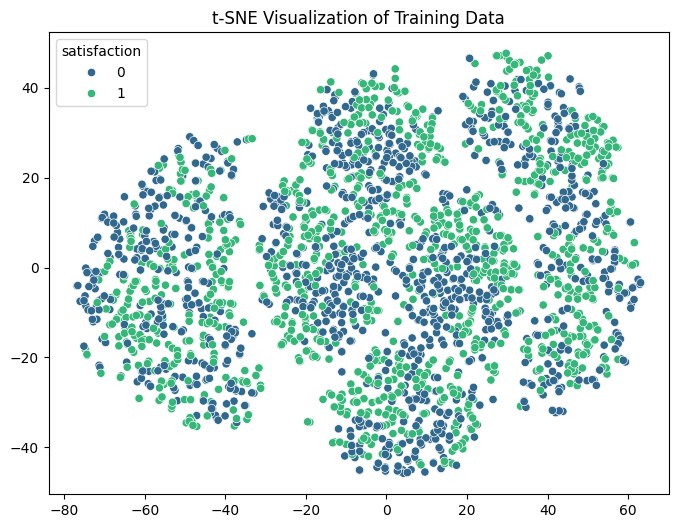

In [35]:
# tsne full form is t-distributed Stochastic Neighbor Embedding

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)
# visualize t-SNE results
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train, palette='viridis')
plt.title('t-SNE Visualization of Training Data')
plt.show()

In [36]:
# t-SNE is like:
# “Compressing high-dimensional data into 2D just to see patterns

# ❌ Not used for training
# ❌ Not used for prediction
# ✅ Only for visualization

# What you were looking for:  
# Do classes separate?
# Is data overlapping?
# Is problem linearly separable?

# “I used t-SNE purely for visualization to observe class separability in reduced dimensions.”



NEURAL NETWORK  

In [37]:
# so next the main part neural networks
# so here we use ANN (Artificial Neural Networks) for classification.
# why ANN because they can capture complex non-linear relationships in the data, making them suitable for tasks like customer satisfaction prediction where patterns may not be easily discernible with traditional models.
# and also ANN can automatically learn feature representations from raw data, reducing the need for extensive manual feature engineering.
# and in the case cnn (Convolutional Neural Networks) and rnn (Recurrent Neural Networks) are specialized neural network architectures designed for specific types of data and they are not typically used for tabular data like in this airline customer satisfaction dataset but used for image and sequential data respectively.
# cnn and rnn has another positives and usecases in areas like image recognition, natural language processing, and time-series analysis but not in this tabular data context.



# Your data is tabular (rows & columns)
# No images → ❌ CNN
# No sequences / time series → ❌ RNN
# Complex non-linear relationships → ✅ ANN

# After dimensionality reduction using PCA, I experimented with an Artificial Neural Network to capture non-linear feature interactions


In [38]:

# data should be scaled before feeding into neural networks for better convergence and performance.
# so lets built a simple ANN model using TensorFlow/Keras for classification.


# because of tensorflow will works only in python 3.11, i created a new environment with python 3.11 and installed tensorflow in it.
# the steps in creating new environment and installing tensorflow are:
# 1. in the same folder where the project is located, open command prompt and run the command: py -3.11 -m venv tf_env
# 2. we can see the new environment created named tf_env
# 3. now activate the environment by running the command: tf_env\Scripts\activate
# 4. upgrade pip by running the command: python -m pip install --upgrade pip
# 5. install tensorflow by running the command: pip install tensorflow
# 6. verify tensorflow installation by running the command: python -c "import tensorflow as tf; print(tf.__version__)"
# 7. connect this environment to vs code
# 8. in vs code, open command palette (top menu-view-palette) (ctrl+shift+p) and select "Python: Select Interpreter"
# 9. choose the interpreter from the tf_env environment that looks like python 3.11.x ('tf_env')
# 10. install other necessary libraries like pandas, numpy, scikit-learn, matplotlib, seaborn, joblib, scikeras
# 11. test it by running a simple tensorflow code snippet in vs code terminal.



CNN → images
RNN → sequences / time series
ANN → tabular data

Dense(64, activation='relu')
64 neurons
Learns patterns
ReLU avoids vanishing gradient

Dropout(0.3)
Randomly disables neurons
Prevents overfitting

Last Dense(1, activation='sigmoid')
Binary output
Gives probability (0–1)

Adam
Adaptive learning rate

Faster convergence
Binary Crossentropy

Used when:
Binary classification
Output is probability

👉 Interview line:

“Binary cross-entropy measures the distance between predicted probabilities and actual labels.”

model.fit()

This is where learning happens:
Forward propagation
Loss calculation
Backpropagation
Weight updates

Epochs
How many times model sees the data.

In [39]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential 
from sklearn.metrics import classification_report, accuracy_score



ann_model = Sequential()

ann_model.add(Dense(32, activation='relu', input_shape=(X_train_pca.shape[1],)))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ann_model.fit(
    X_train_pca,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)



c:\Users\LENOVO\Desktop\Third domain\week 28\tf_env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
c:\Users\LENOVO\Desktop\Third domain\week 28\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6714 - loss: 0.6310 - val_accuracy: 0.8167 - val_loss: 0.5449
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8583 - loss: 0.4498 - val_accuracy: 0.8875 - val_loss: 0.3582
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9250 - loss: 0.2714 - val_accuracy: 0.9396 - val_loss: 0.2218
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9594 - loss: 0.1753 - val_accuracy: 0.9583 - val_loss: 0.1540
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9682 - loss: 0.1274 - val_accuracy: 0.9646 - val_loss: 0.1202
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9724 - loss: 0.0999 - val_accuracy: 0.9708 - val_loss: 0.0957
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9797 - loss: 0.0814 - val_accuracy: 0.9708 - val_loss: 0.0843
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9833 - loss: 0.0680 - val_accuracy: 0.9729 - val_loss:

In [40]:
y_pred_ann_prob = ann_model.predict(X_test_pca)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int)

print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
ANN Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       301
           1       0.97      0.98      0.98       299

    accuracy                           0.97       600
   macro avg       0.98      0.98      0.97       600
weighted avg       0.98      0.97      0.97       600



CROSS-VALIDATION

Cross Validation — WHY DID YOU DO IT?

Train-test split may be lucky or unlucky.
Cross-validation:
Trains on multiple splits
Gives stable performance estimate

Interview line

“Cross-validation ensures the model’s performance is consistent and not dependent on a single train-test split.”

In [41]:
#ANN performed reasonably well, but ensemble models outperformed it for tabular data.
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(
    best_rf,
    X_train,
    y_train,
    cv=5,
    scoring='f1'
)

print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 score:", cv_scores.mean())



Cross-validation F1 scores: [0.9044586  0.925      0.94605809 0.90909091 0.93305439]
Mean CV F1 score: 0.9235323984817541


REAL-WORLD PREDICTION

Create New Passenger Data


In [42]:
new_customer = [[
    30,     # Age
    1,      # Gender (Encoded)
    0,      # Customer Type
    1,      # Travel Type
    2,      # Class
    1200,   # Flight Distance
    5,      # Departure Delay
    3,      # Arrival Delay
    4, 4, 4, 4, 4, 4, 4  # Service ratings
]]


new_customer_scaled = scaler.transform(new_customer)
prediction = best_rf.predict(new_customer_scaled)

if prediction[0] == 1:
    print("Customer is Satisfied 😊")
else:
    print("Customer is Not Satisfied 😞")


Customer is Satisfied 😊


c:\Users\LENOVO\Desktop\Third domain\week 28\tf_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\Desktop\Third domain\week 28\tf_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


I built an end-to-end airline satisfaction prediction system using Random Forest and Neural Networks, focusing on interpretability, generalization, and real-world applicability